In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from keras.losses import MeanAbsolutePercentageError
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from numpy import loadtxt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mfath\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file
data=data.dropna()
data=data.astype(float)
data.columns=['Gc','j','c_old','soc_old','c_dot','soc_dot','d_dot']
df=data
#df
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,-0.3000,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,-0.3000,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,-0.3000,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,-0.3000,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,-0.3000,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,-0.0001,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,-0.0001,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,-0.0001,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,-0.0001,0.997600,0.997596,0.000202,0.000200,0.000093


In [3]:
#df.iloc[:,0]

In [4]:
#GC
print(min(df.iloc[:,0]))
print(max(df.iloc[:,0]))

4.21
13.92


In [5]:
#j
print(min(df.iloc[:,1]))
print(max(df.iloc[:,1]))

-0.3
-0.0001


In [6]:
#c_old
print(min(df.iloc[:,2]))
print(max(df.iloc[:,2]))

0.5
1.003217186101


In [7]:
#soc_old
print(min(df.iloc[:,3]))
print(max(df.iloc[:,3]))

0.5
1.0013275128919998


In [8]:
#c_dot
print(min(df.iloc[:,4]))
print(max(df.iloc[:,4]))

0.000199480131
7.409167018


In [9]:
#soc_dot
print(min(df.iloc[:,5]))
print(max(df.iloc[:,5]))

0.000199733153
0.600129


In [10]:
#d_dot
print(min(df.iloc[:,6]))
print(max(df.iloc[:,6]))

-3.3494799999999997e-06
1.549443


In [11]:
list(dict.fromkeys(df.iloc[:,0]))

[4.21, 5.97, 13.92]

In [12]:
#list(dict.fromkeys(df['j']))

In [13]:
#log J
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1)
#df['soc_dot']=-np.log10( df['soc_dot'])
#df['j']=-np.log10( df['j']*-1)  

In [14]:
#df=df[df['j']<3.3]
#df=df[df['j']>1]
#df
#-np.log10(0.008)

In [15]:
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,0.522879,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,0.522879,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,0.522879,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,0.522879,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,0.522879,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
12299,13.92,4.000000,0.987004,0.987094,0.000201,0.000200,0.000086
12300,13.92,4.000000,0.990530,0.990594,0.000202,0.000200,0.000087
12301,13.92,4.000000,0.994061,0.994095,0.000202,0.000200,0.000089
12302,13.92,4.000000,0.997600,0.997596,0.000202,0.000200,0.000093


Text(0, 0.5, 'j')

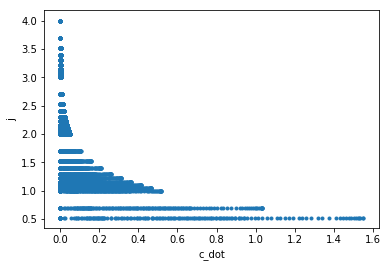

In [16]:
plt.scatter(df.iloc[:,6],df.iloc[:,1],marker='.')
plt.xlabel('c_dot')
plt.ylabel('j')
#plt.xlim(0,0.06)

In [17]:
#df=df[df['J']<-0.001]


In [18]:
#data_num = data.to_numpy()
#print(data_num[0,:])

In [19]:
#reduced_data = np.array([])
#reduced_data2 = np.array([])

#number = 0

# for i in data_num[:]:
    
#     if i[0] <= -0.25:
        
#         number += 1
#         #print(number)
#         reduced_data = np.append(reduced_data, i, axis = 0 )
#         #reduced_data.append(i)
    
#     else:
        #max
#         reduced_data2 = np.append(reduced_data2, i, axis = 0 )
        
    
# reduced_data = np.reshape(reduced_data, (int(reduced_data.shape[0]/3), 3))

# print(" number of elements for j < -0. 25 size is ",reduced_data.shape)


# reduced_data2 = np.reshape(reduced_data2, (int(reduced_data2.shape[0]/3), 3))

# print(" number of elements for j > -0. 25 size is ", reduced_data2.shape)

# print( "In total there are  " + str(int(reduced_data.shape[0]) + int(reduced_data2.shape[0])) + " samples")


In [20]:
#plt.hist(reduced_data[:,0])

In [21]:
#plt.hist(reduced_data2[:,0])


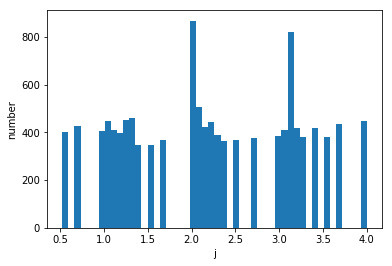

In [22]:
#j
plt.hist(df.iloc[:,1], bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)

plt.xlabel('j')
plt.ylabel('number')
plt.show()

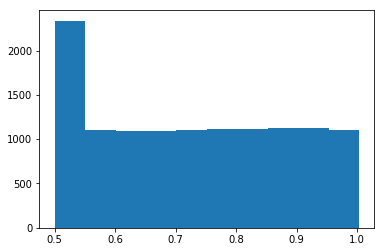

In [23]:
#c_old
plt.hist(df['c_old'])
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

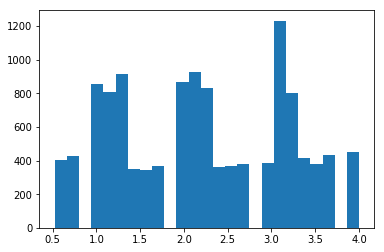

In [24]:
plt.hist(df['j'],bins=25)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

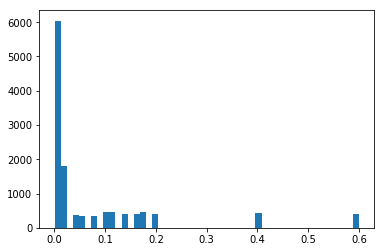

In [25]:
plt.hist(df['soc_dot'],bins=50)
# #plt.ylim(0.2,0.4)
# plt.xlim(-0.1,0)
plt.show()

In [26]:
print(min(df['c_dot']))
print(max(df['c_dot']))

0.000199480131
7.409167018


In [27]:
df=df[df['j']<2]
df

,Gc,j,c_old,soc_old,c_dot,soc_dot,d_dot
0,4.21,0.522879,0.500000,0.500000,7.409167,0.600128,0.000000
1,4.21,0.522879,0.507409,0.500600,3.954095,0.600128,0.000000
2,4.21,0.522879,0.511363,0.501200,2.974950,0.600129,0.000000
3,4.21,0.522879,0.514338,0.501800,2.501118,0.600128,0.000000
4,4.21,0.522879,0.516839,0.502401,2.208906,0.600128,0.000000
...,...,...,...,...,...,...,...
9628,13.92,1.698970,0.978937,0.979286,0.045015,0.040009,0.016262
9629,13.92,1.698970,0.984072,0.983787,0.046413,0.040009,0.016804
9630,13.92,1.698970,0.989381,0.988288,0.048159,0.040009,0.017262
9631,13.92,1.698970,0.994911,0.992788,0.050382,0.040009,0.017746


## transformation

In [34]:
X=df.iloc[:,0:4]
y=df.iloc[:,4:7]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=40)

from sklearn.preprocessing import MinMaxScaler 
#scaler = StandardScaler()

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled_data=scaler.transform(X_train)
X_test_scaled_data=scaler.transform(X_test)

scaler_y = MinMaxScaler()

#scaler_y = StandardScaler()
scaler_y.fit(np.array(y_train))
y_train_scaled_data=scaler_y.transform(np.array(y_train))
y_test_scaled_data=scaler_y.transform(np.array(y_test))

In [35]:
model = Sequential()
model.add(Dense(1024*3, input_dim=4, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(3,activation='relu'))
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [36]:
history=model.fit(X_train_scaled_data, y_train_scaled_data, epochs=500, batch_size=80)

Epoch 1/500
3348/3348 [==============================] - 0s 96us/step - loss: 0.0541 - accuracy: 0.1138
Epoch 2/500
3348/3348 [==============================] - 0s 60us/step - loss: 0.0530 - accuracy: 0.1081
Epoch 3/500
3348/3348 [==============================] - 0s 60us/step - loss: 0.0529 - accuracy: 0.1081
Epoch 4/500
3348/3348 [==============================] - 0s 61us/step - loss: 0.0528 - accuracy: 0.1108
Epoch 5/500
3348/3348 [==============================] - 0s 57us/step - loss: 0.0527 - accuracy: 0.1135
Epoch 6/500
3348/3348 [==============================] - 0s 57us/step - loss: 0.0200 - accuracy: 0.6195
Epoch 7/500
3348/3348 [==============================] - 0s 61us/step - loss: 0.0017 - accuracy: 0.7978
Epoch 8/500
3348/3348 [==============================] - 0s 55us/step - loss: 9.7336e-04 - accuracy: 0.8354
Epoch 9/500
3348/3348 [==============================] - 0s 53us/step - loss: 6.5190e-04 - accuracy: 0.8722
Epoch 10/500
3348/3348 [==============================] 

3348/3348 [==============================] - 0s 50us/step - loss: 5.8470e-05 - accuracy: 0.9794
Epoch 76/500
3348/3348 [==============================] - 0s 47us/step - loss: 5.1431e-05 - accuracy: 0.9869
Epoch 77/500
3348/3348 [==============================] - 0s 53us/step - loss: 5.1512e-05 - accuracy: 0.9851
Epoch 78/500
3348/3348 [==============================] - 0s 59us/step - loss: 4.9829e-05 - accuracy: 0.9878 0s - loss: 4.8961e-05 - accuracy: 0.
Epoch 79/500
3348/3348 [==============================] - 0s 59us/step - loss: 5.5575e-05 - accuracy: 0.9851
Epoch 80/500
3348/3348 [==============================] - 0s 58us/step - loss: 5.7414e-05 - accuracy: 0.9809
Epoch 81/500
3348/3348 [==============================] - 0s 50us/step - loss: 6.0230e-05 - accuracy: 0.9821
Epoch 82/500
3348/3348 [==============================] - 0s 45us/step - loss: 6.0920e-05 - accuracy: 0.9791
Epoch 83/500
3348/3348 [==============================] - 0s 50us/step - loss: 6.4222e-05 - accuracy: 0.

3348/3348 [==============================] - 0s 51us/step - loss: 4.6972e-05 - accuracy: 0.9886
Epoch 149/500
3348/3348 [==============================] - 0s 48us/step - loss: 4.7752e-05 - accuracy: 0.9857
Epoch 150/500
3348/3348 [==============================] - 0s 47us/step - loss: 4.6155e-05 - accuracy: 0.9878
Epoch 151/500
3348/3348 [==============================] - 0s 45us/step - loss: 4.9918e-05 - accuracy: 0.9863
Epoch 152/500
3348/3348 [==============================] - 0s 49us/step - loss: 4.6666e-05 - accuracy: 0.9857
Epoch 153/500
3348/3348 [==============================] - 0s 45us/step - loss: 4.7570e-05 - accuracy: 0.9839
Epoch 154/500
3348/3348 [==============================] - 0s 48us/step - loss: 4.7234e-05 - accuracy: 0.9848
Epoch 155/500
3348/3348 [==============================] - 0s 50us/step - loss: 5.3860e-05 - accuracy: 0.9812
Epoch 156/500
3348/3348 [==============================] - 0s 50us/step - loss: 5.0445e-05 - accuracy: 0.9866
Epoch 157/500
3348/3348 

3348/3348 [==============================] - 0s 54us/step - loss: 5.5276e-05 - accuracy: 0.9848
Epoch 223/500
3348/3348 [==============================] - 0s 84us/step - loss: 5.1632e-05 - accuracy: 0.9866
Epoch 224/500
3348/3348 [==============================] - 0s 62us/step - loss: 4.7788e-05 - accuracy: 0.9872
Epoch 225/500
3348/3348 [==============================] - 0s 52us/step - loss: 4.4608e-05 - accuracy: 0.9910
Epoch 226/500
3348/3348 [==============================] - 0s 51us/step - loss: 4.4004e-05 - accuracy: 0.9895
Epoch 227/500
3348/3348 [==============================] - 0s 54us/step - loss: 4.5779e-05 - accuracy: 0.9884
Epoch 228/500
3348/3348 [==============================] - 0s 52us/step - loss: 4.6001e-05 - accuracy: 0.9901
Epoch 229/500
3348/3348 [==============================] - 0s 52us/step - loss: 4.6825e-05 - accuracy: 0.9878
Epoch 230/500
3348/3348 [==============================] - 0s 55us/step - loss: 4.3214e-05 - accuracy: 0.9907
Epoch 231/500
3348/3348 

3348/3348 [==============================] - 0s 64us/step - loss: 6.6173e-06 - accuracy: 0.9892
Epoch 297/500
3348/3348 [==============================] - 0s 48us/step - loss: 7.1370e-06 - accuracy: 0.9869
Epoch 298/500
3348/3348 [==============================] - 0s 58us/step - loss: 4.0817e-06 - accuracy: 0.9958
Epoch 299/500
3348/3348 [==============================] - 0s 56us/step - loss: 3.4153e-06 - accuracy: 0.9949
Epoch 300/500
3348/3348 [==============================] - 0s 58us/step - loss: 8.1925e-06 - accuracy: 0.9901
Epoch 301/500
3348/3348 [==============================] - 0s 58us/step - loss: 6.6161e-06 - accuracy: 0.9901
Epoch 302/500
3348/3348 [==============================] - 0s 54us/step - loss: 3.6845e-06 - accuracy: 0.9940
Epoch 303/500
3348/3348 [==============================] - 0s 62us/step - loss: 4.4783e-06 - accuracy: 0.9958
Epoch 304/500
3348/3348 [==============================] - 0s 55us/step - loss: 4.8697e-06 - accuracy: 0.9937
Epoch 305/500
3348/3348 

3348/3348 [==============================] - 0s 51us/step - loss: 4.1592e-06 - accuracy: 0.9937
Epoch 371/500
3348/3348 [==============================] - 0s 48us/step - loss: 3.9548e-06 - accuracy: 0.9916
Epoch 372/500
3348/3348 [==============================] - 0s 43us/step - loss: 3.1243e-06 - accuracy: 0.9928
Epoch 373/500
3348/3348 [==============================] - 0s 45us/step - loss: 4.2443e-06 - accuracy: 0.9958
Epoch 374/500
3348/3348 [==============================] - 0s 44us/step - loss: 8.0908e-06 - accuracy: 0.9922
Epoch 375/500
3348/3348 [==============================] - 0s 44us/step - loss: 1.3465e-05 - accuracy: 0.9907
Epoch 376/500
3348/3348 [==============================] - 0s 43us/step - loss: 1.0677e-05 - accuracy: 0.9827
Epoch 377/500
3348/3348 [==============================] - 0s 44us/step - loss: 7.1593e-06 - accuracy: 0.9925
Epoch 378/500
3348/3348 [==============================] - 0s 44us/step - loss: 4.8174e-06 - accuracy: 0.9925
Epoch 379/500
3348/3348 

3348/3348 [==============================] - 0s 46us/step - loss: 8.1463e-06 - accuracy: 0.9827
Epoch 445/500
3348/3348 [==============================] - 0s 46us/step - loss: 6.8453e-06 - accuracy: 0.9898
Epoch 446/500
3348/3348 [==============================] - 0s 45us/step - loss: 5.1271e-06 - accuracy: 0.9925
Epoch 447/500
3348/3348 [==============================] - 0s 44us/step - loss: 3.0268e-06 - accuracy: 0.9943
Epoch 448/500
3348/3348 [==============================] - 0s 45us/step - loss: 3.4069e-06 - accuracy: 0.9958
Epoch 449/500
3348/3348 [==============================] - 0s 44us/step - loss: 3.7377e-06 - accuracy: 0.9937
Epoch 450/500
3348/3348 [==============================] - 0s 43us/step - loss: 5.4582e-06 - accuracy: 0.9925
Epoch 451/500
3348/3348 [==============================] - 0s 44us/step - loss: 3.9017e-06 - accuracy: 0.9967
Epoch 452/500
3348/3348 [==============================] - 0s 44us/step - loss: 2.4865e-06 - accuracy: 0.9964
Epoch 453/500
3348/3348 

In [64]:
y_pred = model.predict(X_test_scaled_data)
y_pred_train= model.predict(X_train_scaled_data)
mseMLP = mean_squared_error(y_test_scaled_data, y_pred)
maeMLP = mean_absolute_error(y_test_scaled_data, y_pred)
print("Train R2 score MLP: {:.5f}".format(r2_score(y_pred_train, y_train_scaled_data)))
print("Test R2 score MLP: {:.5f}".format(r2_score(y_pred, y_test_scaled_data)))
print("MSE MLP: %.7f" % mseMLP)  
print("MAE MLP:", maeMLP)

Train R2 score MLP: 0.99946
Test R2 score MLP: 0.99950
MSE MLP: 0.0000080
MAE MLP: 0.0017083280964060334


In [65]:
filename = '1024_500_smallJ-10nov.sav'
joblib.dump(model, filename)
#np.savetxt('history_small.txt',history)

['1024_500_smallJ-10nov.sav']

In [66]:
loss_history=history.history['loss']
accuracy_history=history.history['accuracy']
np.savetxt('history_loss_small.txt',loss_history)
np.savetxt('history_accuracy_small.txt',accuracy_history)

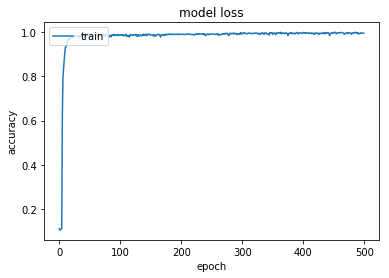

In [67]:
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

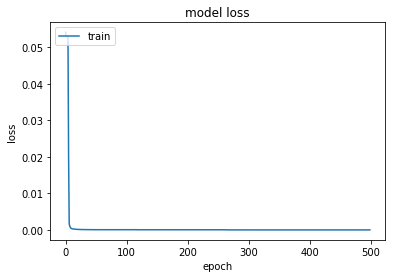

In [68]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
#import joblib
#model= joblib.load('keras_1024_200_v2.sav')

In [70]:
# # #load the saved model and test the performance
# import joblib
# M_s= joblib.load('MLP_150921_MaxMinScale_v1.sav')
# y_pred = M_s.predict(X_test_scaled_data)
# y_pred_train= M_s.predict(X_train_scaled_data)
# mseMLP = mean_squared_error(y_test_scaled_data, y_pred)



# print("Train R2 score MLP: {:.5f}".format(M_s.score(X_train_scaled_data, y_train_scaled_data)))


# print("Test R2 score MLP: {:.5f}".format(M_s.score(X_test_scaled_data, y_test_scaled_data)))



# print("MSE MLP: %.4f" % mseMLP)


# print("MAE MLP:", mean_absolute_error(y_test_scaled_data, y_pred))

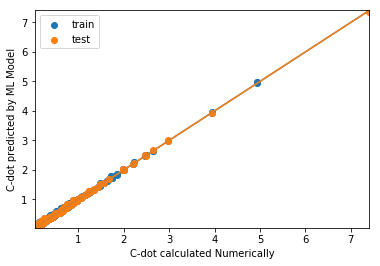

In [71]:
plt.scatter(np.array(y_train.iloc[:,0]),scaler_y.inverse_transform(y_pred_train)[:,0],label='train')
plt.scatter(np.array(y_test.iloc[:,0]),scaler_y.inverse_transform(y_pred)[:,0],label='test')
plt.xlabel('C-dot calculated Numerically')
plt.ylabel('C-dot predicted by ML Model')

lims = [y_test.iloc[:,0].min(), y_test.iloc[:,0].max()]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

_ = plt.plot(lims, lims)
plt.legend()

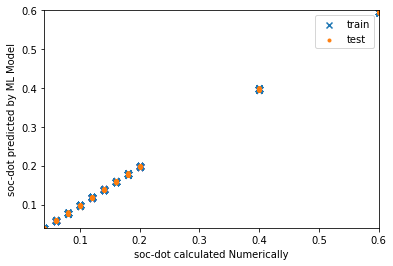

In [72]:
plt.scatter(np.array(y_train.iloc[:,1]),scaler_y.inverse_transform(y_pred_train)[:,1],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,1]),scaler_y.inverse_transform(y_pred)[:,1],marker='.',label='test')
plt.xlabel('soc-dot calculated Numerically')
plt.ylabel('soc-dot predicted by ML Model')

lims = [y_test.iloc[:,1].min(), y_test.iloc[:,1].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

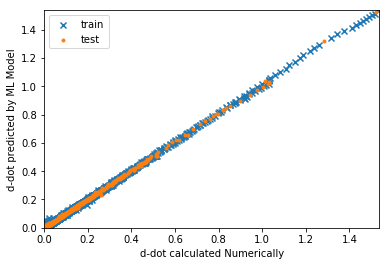

In [73]:
plt.scatter(np.array(y_train.iloc[:,2]),scaler_y.inverse_transform(y_pred_train)[:,2],marker='x',label='train')
plt.scatter(np.array(y_test.iloc[:,2]),scaler_y.inverse_transform(y_pred)[:,2],marker='.',label='test')
plt.xlabel('d-dot calculated Numerically')
plt.ylabel('d-dot predicted by ML Model')

lims = [y_test.iloc[:,2].min(), y_test.iloc[:,2].max()]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims,color='g')

#_ = plt.plot(lims, lims)
plt.legend()

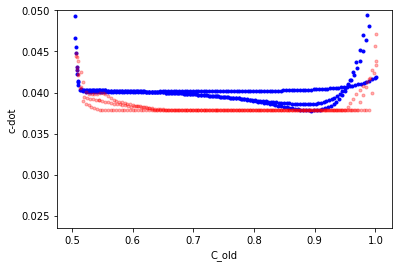

In [74]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file.iloc[:,:7]
data=data.dropna()
data=data.astype(float)
#data.columns=['J','C_old','soc_old','C_dot','soc_dot','d']
df=data
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1) 
#df.iloc[:,5]=-np.log10( df.iloc[:,1]) 
#df=data


df.loc[df.iloc[:,1] ==1.6989700043360187, 'test J match'] = 'True'
#df=df[df['Gc']==5.97]
#aa = df.loc[df['test J match'] == 'True']
fake_input = df.loc[df['test J match'] == 'True'].iloc[:,0:4]
fake_output_batch = df.loc[df['test J match'] == 'True'].iloc[:,4:7]


fake_input_scaled=scaler.transform(fake_input)           #scale fake input
predicted=model.predict(fake_input_scaled)
#predicted_Cdot= M11_s.predict(fake_input_scaled)[:,0]   #predict fake dataC 
#predicted_SOCdot= M11_s.predict(fake_input_scaled)[:,1]
#predicted_d= M11_s.predict(fake_input_scaled)[:,2]

#predict_j_fix_true=scaler_y.inverse_transform(predict_j_fix_scaled)  #scale back

plt.plot(fake_input.iloc[:,2],fake_output_batch.iloc[:,0], '.b')
plt.plot(fake_input.iloc[:,2],scaler_y.inverse_transform(predicted)[:,0], '.r', alpha=0.3)
plt.xlabel('C_old')
plt.ylabel('c-dot')
plt.ylim(0.0235,0.05)
#plt.xlim(.4, 1.2)

# plt.figure()
plt.show()

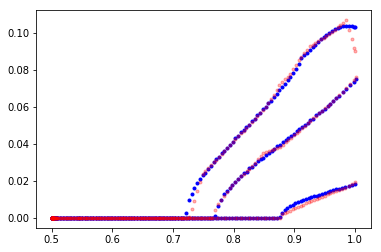

In [75]:
#read file
read_file= pd.read_csv('final_data.txt', sep='	')
data=read_file.iloc[:,:7]
data=data.dropna()
data=data.astype(float)
#data.columns=['J','C_old','soc_old','C_dot','soc_dot','d']
df=data
#j
df.iloc[:,1]=-np.log10( df.iloc[:,1]*-1) 
#soc_dot
#df.iloc[:,5]=-np.log10( df.iloc[:,5]) 
#df=data


df.loc[df.iloc[:,1] ==1.6989700043360187, 'test J match'] = 'True'
#df=df[df['Gc']==5.97]
#aa = df.loc[df['test J match'] == 'True']
fake_input = df.loc[df['test J match'] == 'True'].iloc[:,0:4]
fake_output_batch = df.loc[df['test J match'] == 'True'].iloc[:,4:7]


fake_input_scaled=scaler.transform(fake_input)           #scale fake input
predicted=model.predict(fake_input_scaled)
#predicted_Cdot= M11_s.predict(fake_input_scaled)[:,0]   #predict fake dataC 
#predicted_SOCdot= M11_s.predict(fake_input_scaled)[:,1]
#predicted_d= M11_s.predict(fake_input_scaled)[:,2]

#predict_j_fix_true=scaler_y.inverse_transform(predict_j_fix_scaled)  #scale back

plt.plot(fake_input.iloc[:,2],fake_output_batch.iloc[:,2], '.b')
plt.plot(fake_input.iloc[:,2],scaler_y.inverse_transform(predicted)[:,2], '.r', alpha=0.3)
#plt.xlabel('d_old')
#plt.ylabel('c-dot')
#plt.ylim(0.00,0.00023)
# #plt.xlim(.4, .8)

# plt.figure()
plt.show()

In [76]:
#J
list(dict.fromkeys(df.iloc[:,1]))

[0.5228787452803376,
 0.6989700043360187,
 1.0,
 1.0457574905606752,
 1.0969100130080565,
 1.154901959985743,
 1.2218487496163564,
 1.3010299956639813,
 1.3979400086720375,
 1.5228787452803376,
 1.6989700043360187,
 2.0,
 2.0457574905606752,
 2.0969100130080562,
 2.154901959985743,
 2.221848749616356,
 2.3010299956639813,
 2.3979400086720375,
 2.5228787452803374,
 2.6989700043360187,
 3.0,
 3.0457574905606752,
 3.0969100130080562,
 3.154901959985743,
 3.2218487496163566,
 3.3010299956639813,
 3.3979400086720375,
 3.5228787452803374,
 3.6989700043360187,
 4.0]

In [77]:
np.savetxt('scaled__201021.txt',X_train_scaled_data[:,0])
np.savetxt('scaled_x2_201021.txt',X_train_scaled_data[:,1])
np.savetxt('scaled_x3_201021.txt',X_train_scaled_data[:,2])
np.savetxt('scaled_x4_201021.txt',X_train_scaled_data[:,3])
np.savetxt('scaled_y1_201021.txt',y_train_scaled_data[:,0])
np.savetxt('scaled_y2_201021.txt',y_train_scaled_data[:,1])
np.savetxt('scaled_y3_201021.txt',y_train_scaled_data[:,2])

np.savetxt('x1_201021.txt',X_train.iloc[:,0])
np.savetxt('x2_201021.txt',X_train.iloc[:,1])
np.savetxt('x3_201021.txt',X_train.iloc[:,2])
np.savetxt('x4_201021.txt',X_train.iloc[:,3])
np.savetxt('y1_201021.txt',y_train.iloc[:,0])
np.savetxt('y2_201021.txt',y_train.iloc[:,1])
np.savetxt('y3_201021.txt',y_train.iloc[:,2])

np.savetxt('weight1_row1_201021.txt',model.layers[0].get_weights()[0][0,:])
np.savetxt('weight1_row2_201021.txt',model.layers[0].get_weights()[0][1,:])
np.savetxt('weight1_row3_201021.txt',model.layers[0].get_weights()[0][2,:])
np.savetxt('weight1_row4_201021.txt',model.layers[0].get_weights()[0][3,:])

np.savetxt('weight2_c1_201021.txt',model.layers[1].get_weights()[0][:,0])
np.savetxt('weight2_c2_201021.txt',model.layers[1].get_weights()[0][:,1])
np.savetxt('weight2_c3_201021.txt',model.layers[1].get_weights()[0][:,2])

np.savetxt('bias1_201021.txt',model.layers[0].get_weights()[1])
np.savetxt('bias2_201021_.txt',model.layers[1].get_weights()[1])

In [ ]:
a=np.array([1,2,3])

In [ ]:
a[0:3]

In [ ]:
a=[5,10,15,20,25,30,35,40,45,50,55,60]
b=[0.114,0.129,0.149,0.169,0.196,0.222,0.255,0.293,0.334,0.379,0.427,0.4822]

In [ ]:
plt.scatter(a,b)